# Null Model Comparsion 

In [24]:
#Libraries
import pandas as pd #Data frame Libraries 
import networkx as nx #Network Library
import matplotlib.pyplot as plt #Plotting Library
import numpy as np #Numpy Library
from collections import defaultdict
from scipy.stats import poisson #Poisson distribution
import random
import pickle
import random
import powerlaw as pl

The number of nodes is 935
The number of edges is 65610
The average degree is 140.3422459893048
The average clustering coefficient is 0.6148425479036286
The degree assortativity is 0.15243468526774323


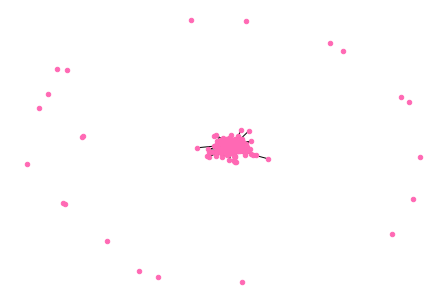

In [2]:
#Importing the dataset
with open('NETWORK.pkl', 'rb') as f:
    red_pickle = pickle.load(f)
    
Graph = nx.Graph(red_pickle)

nx.draw(Graph, node_size=20 , node_color='#FF69B4' , node_shape='o' )

print("The number of nodes is", len(Graph) )
print("The number of edges is", len(Graph.edges) )
K = 2*len(Graph.edges)/len(Graph)
print("The average degree is", K )
C = nx.average_clustering(Graph)                         
print("The average clustering coefficient is", C)
A = nx.degree_assortativity_coefficient(Graph)
print("The degree assortativity is", A)

General properties of the Network:
- The number of nodes is:	 913
- The number of edges is:	 65608
- The average degree is:		 143.7196056955093
The average clustering coefficient of the real network is:  0.6296580309856437
The degree assortativity of the real network is 0.152312310807446
The diameter of the real network is 6
Average Shortest Path of the real network:  1.9785745854230319
The clustering coefficient that the network would have if it were random   0.15758728694683038


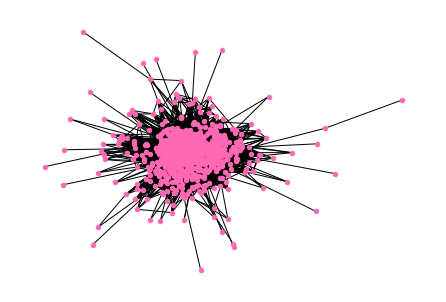

In [3]:
#General properties

#Idientify connected components
connected_components = list(nx.connected_components(Graph))

#We want the largest component
largest_component = max(connected_components, key=len)
G = Graph.subgraph(largest_component).copy()


N = len(G) #Number of Nodes
L = len(G.edges)  #Number of edges
k = 2*L/N #Average degree
C = nx.average_clustering(G) #The average clustering coefficient
d = nx.average_shortest_path_length(G,weight=None)
A = nx.degree_assortativity_coefficient(G)
DIAM = nx.diameter(G)

p = k / (N-1) #The clustering coefficient that the network would have if it were random 

print('General properties of the Network:')
print('- The number of nodes is:\t', N)
print('- The number of edges is:\t', L)
print('- The average degree is:\t\t', k)

print("The average clustering coefficient of the real network is: ", C)
print("The degree assortativity of the real network is", A)
print("The diameter of the real network is", DIAM)
print("Average Shortest Path of the real network: ", d)


print("The clustering coefficient that the network would have if it were random  ", p)


nx.draw(G, node_size=20 , node_color='#FF69B4' , node_shape='o' )

In [4]:
#Generating the dictionaries REAL NETWORK
grado_dict = dict(nx.degree(G)) #Creating a dictionary of the degrees of the network
clustering_dict = nx.clustering(G) #Creating a dictionary with the clustering coefficients

#Generating a data frame with the degree and clustering of each node REAL NETWORK
df1 = pd.DataFrame([grado_dict, clustering_dict]).T #Writting this above as a dataframe
df1.columns = ['Degree', 'Clustering']

#Let this give us the maximum degree of the node
K = df1.Degree.max() #REAL

df1.head()

,Degree,Clustering
0,96.0,0.498026
1,323.0,0.609849
2,334.0,0.579939
3,302.0,0.638930
4,134.0,0.433734


In [25]:
#Fitting the plot
def plot_deg_dist_and_fit(G, bins):
    color='#FF69B4'
    deg = [val for (node, val) in G.degree()]
    kmin, kmax = min(deg), max(deg)
    be = np.logspace(np.log10(kmin), np.log10(kmax), bins) # logarithms of bin edges
    logbe = np.log10(be)
    #"x" values should be midway through each bin (in log space)
    x = 10**((logbe[1:] + logbe[:-1])/2)
    #plot empirical data
    plt.figure(figsize = [15,8])
    p, _ = np.histogram(deg, bins=be, density=True)
    plt.loglog(x, p, color=color, linestyle='none', marker='o', alpha=0.65,
               markeredgecolor='none', label="N = {0}".format(len(G)))
    #plot theoretical fit. Here we define xmin and xmax, 
    #but the powerlaw package can determine the best choices 
    #of xmin and xmax for real data
    fit = pl.Fit(deg, xmin=min(deg), xmax=max(deg))
    print('gamma= ',fit.power_law.alpha)
    fit.power_law.plot_pdf(color="grey")
    
    #Limiting the y axis 
    plt.ylim([0.5*y0[y0>0].min(),1.1*y0.max()])
    
    #Print
    plt.xlabel('Degree Distribution (k)', fontsize = 20, fontname=font_name)
    plt.ylabel('Probability Distribution Function (PDF)', fontsize = 20, fontname=font_name)

gamma=  1.2262024929007442


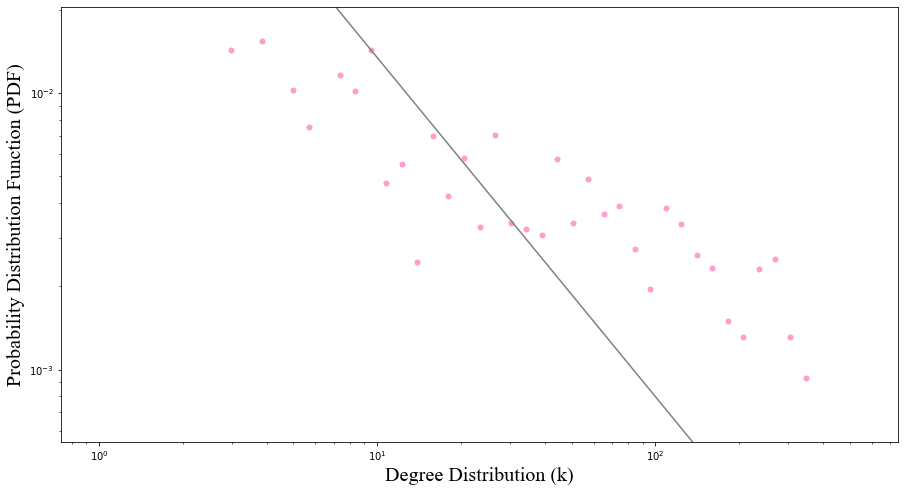

In [37]:
plot_deg_dist_and_fit(G, 50)

## Erdos-Renyi

In [7]:
#Creating the undirected ER network
ER = nx.erdos_renyi_graph(N, p, directed=False)

#Generating the dictionaries ER NETWORK
grado_dictER = dict(nx.degree(ER)) #Creating a dictionary of the degrees of the network
clustering_dictER = nx.clustering(ER) #Creating a dictionary with the clustering coefficients

#Generating a data frame with the degree and clustering of each node REAL NETWORK
df2 = pd.DataFrame([grado_dictER, clustering_dictER]).T #Writting this above as a dataframe
df2.columns = ['Degree', 'Clustering']

#Maximum degree
KER = df2.Degree.max() #ER

In [8]:
#This is just one instance of a random graph. We need to create an ensemble.
#Comparing just with one random graph is not enough, that's why we create an ensemble of ER 

#Creatimng empyt lists to append
clustering_ER = []
short_path_ER = []
Assor_ER = []
Diam_ER = []

#An ensemble with 100 ER data
for i in range(100): # 1000 is better
    
    #Creating the undirected ER graph
    ER = nx.fast_gnp_random_graph(N, p)
    
    #Calculating the mean clustering value of the ER
    C_ER = np.mean(list(nx.clustering(ER).values()))
    
    A_ER = nx.degree_assortativity_coefficient(ER)
                                
    D_ER = nx.diameter(ER)
    
    
    
    #If the network is connected then...
    if nx.is_connected(ER)==True:
        
        #....Calculate the shortest path for the ER
        d_ER = nx.average_shortest_path_length(ER,weight=None)
        
     
    #Appending the resulting values
    clustering_ER.append(C_ER)
    short_path_ER.append(d_ER)
    Assor_ER.append(A_ER)
    Diam_ER.append(D_ER)
    
#Printing on screen    
print("The mean clustering coefficient fot the ER graph is: ", np.mean(clustering_ER))
print("The standar deviation of the clustering coefficient fot the ER graph is: ", np.std(clustering_ER))
print("")
print("The mean shortest path fot the ER graph is: ", np.mean(short_path_ER))
print("The standar deviation of the shortest path fot the ER graph is: ", np.std(short_path_ER))
print("")
print("The mean diameter fot the ER graph is: ", np.mean(Diam_ER))
print("The standar deviation of the diameter fot the ER graph is: ", np.std(Diam_ER))
print("")
print("The mean Assortativity for the ER graph is: ", np.mean(Assor_ER))
print("The standar deviation of the Assortativiy for the ER graph is: ", np.std(Assor_ER))

The mean clustering coefficient fot the ER graph is:  0.15766837185015695
The standar deviation of the clustering coefficient fot the ER graph is:  0.000631909391568538

The mean shortest path fot the ER graph is:  1.8423212226898023
The standar deviation of the shortest path fot the ER graph is:  0.0006025866076179869

The mean diameter fot the ER graph is:  2.0
The standar deviation of the diameter fot the ER graph is:  0.0

The mean Assortativity for the ER graph is:  -0.002238719133409638
The standar deviation of the Assortativiy for the ER graph is:  0.003209713789055503


## Configuration model

In [12]:
def generate_connected_configuration_model(real_graph):
    
    #Get the degree distribution of the real network
    degree_sequence = [d for n, d in real_graph.degree()]

    #Create a random network based on degree distribution
    config_model = nx.configuration_model(degree_sequence, seed=random.randint(1, 1000))

    #Convert the multigraph into a simple graph
    config_model_simple = nx.Graph(config_model)

    #Verify if the graph is connected
    if not nx.is_connected(config_model_simple):
        #If is not connected...lets connect it randomly
        components = list(nx.connected_components(config_model_simple))
        for i in range(len(components) - 1):
            node_from = random.choice(list(components[i]))
            node_to = random.choice(list(components[i + 1]))
            config_model_simple.add_edge(node_from, node_to)

    return config_model_simple

In [13]:
#Call the function
CM_graph = generate_connected_configuration_model(G)

#Generating the dictionaries Configuration Model
grado_dictCM = dict(nx.degree(CM_graph)) #Creating a dictionary of the degrees of the network
clustering_dictCM = nx.clustering(CM_graph) #Creating a dictionary with the clustering coefficients

#Generating a data frame with the degree and clustering of each node Configuration Model
df3 = pd.DataFrame([grado_dictCM, clustering_dictCM]).T #Writting this above as a dataframe
df3.columns = ['Degree', 'Clustering']

KCM = df3.Degree.max()

Text(0, 0.5, 'Probability Mass Distribution')

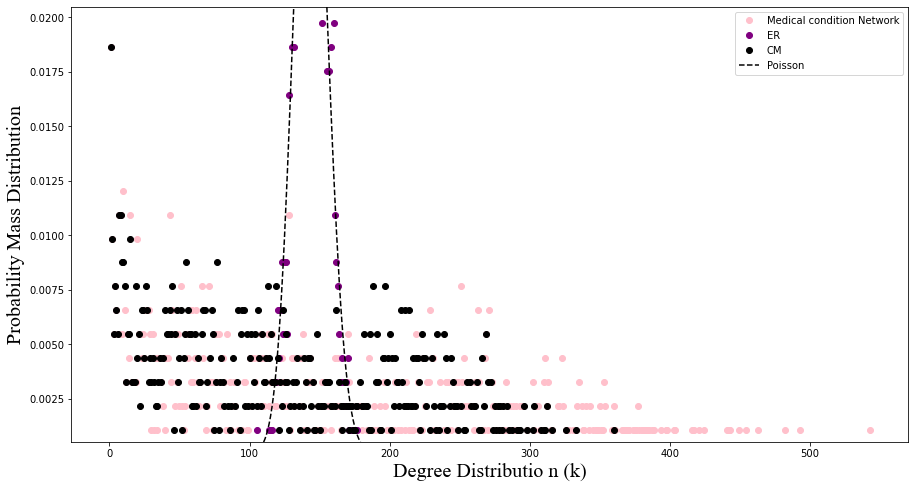

In [17]:
#A histogram to compare to our random Network with the null model

#Medical condition arrangement
y0,x0 = np.histogram(df1.Degree.values, bins = range(int(K)+1), density= True) 
#Erdos'Renyi arrangement
y0ER,x0ER = np.histogram(df2.Degree.values, bins = range(int(KER)+1), density= True) 
#Configuration Model arrangement
y0CM,x0CM = np.histogram(df3.Degree.values, bins = range(int(KCM)+1), density= True) 

#Figures instance
plt.figure(figsize = [15,8])  #Size
plt.plot(x0[:-1], y0, "o", label = 'Medical condition Network', color='pink')#Barplot
plt.plot(x0ER[:-1], y0ER, "o", label = 'ER', color='purple')#Barplot

plt.plot(x0CM[:-1], y0CM, "o", label = 'CM', color='k') #Barplot
plt.plot(x0[:-1], poisson.pmf(x0[:-1], k), color='k',  linestyle='--', label = 'Poisson') #Plotting Poisson
font_name = "Times New Roman" 

#Labels
plt.ylim([0.5*y0[y0>0].min(),1.1*y0.max()]) #Limiting the y-axis
plt.xlim() 
plt.legend()
plt.xlabel('Degree Distributio n (k)', fontsize = 20, fontname=font_name)
plt.ylabel('Probability Mass Distribution', fontsize = 20, fontname=font_name)

In [20]:
#This is just one instance of a random graph. We need to create an ensemble.
#Comparing just with one random graph is not enough, that's why we create an ensemble of ER 

#Creatimng empyt lists to append
clustering_CM = []
short_path_CM = []
Assor_CM = []
Diam_CM = []

#An ensemble with 100 ER data
for i in range(100): # 1000 is better
    
    CM_graph = generate_connected_configuration_model(G)
    
    #Calculating the mean clustering value of the ER
    C_CM = np.mean(list(nx.clustering(CM_graph).values()))
    
    A_CM = nx.degree_assortativity_coefficient(CM_graph)
                                
    D_CM = nx.diameter(CM_graph)
    
    
    
    #If the network is connected then...
    if nx.is_connected(CM_graph)==True:
        
        #....Calculate the shortest path for the ER
        d_CM = nx.average_shortest_path_length(CM_graph,weight=None)
        
     
    #Appending the resulting values
    clustering_CM.append(C_CM)
    short_path_CM.append(d_CM)
    Assor_CM.append(A_CM)
    Diam_CM.append(D_CM)
    
#Printing on screen    
print("The mean clustering coefficient fot the CM graph is: ", np.mean(clustering_CM))
print("The standar deviation of the clustering coefficient fot the ER graph is: ", np.std(clustering_CM))
print("")
print("The mean shortest path fot the CM graph is: ", np.mean(short_path_CM))
print("The standar deviation of the shortest path fot the ER graph is: ", np.std(short_path_CM))
print("")
print("The mean diameter fot the CM graph is: ", np.mean(Diam_CM))
print("The standar deviation of the diameter fot the ER graph is: ", np.std(Diam_CM))
print("")
print("The mean for the Assortativity graph in CM is: ", np.mean(Assor_CM))
print("The standar deviation of the Assortativiy for the  gCMraph is: ", np.std(Assor_CM))

The mean clustering coefficient fot the ER graph is:  0.2966901267575101
The standar deviation of the clustering coefficient fot the ER graph is:  0.002395161542867706

The mean shortest path fot the CM graph is:  1.9661483493783747
The standar deviation of the shortest path fot the ER graph is:  0.0016020974313818747

The mean diameter fot the ER graph is:  4.06
The standar deviation of the diameter fot the ER graph is:  0.23748684174075832

The mean diameter for the Assortativity graph is:  -0.04017390500429627
The standar deviation of the Assortativiy for the ER graph is:  0.0036896701264852064
